<a href="https://www.kaggle.com/code/dataranch/gun-violence-prediction-ts-forecasting?scriptVersionId=111688933" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Gun Violence Dataset | Time Series Forecasting 📊**</div>

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Plug & Play**</div>

In [2]:
# Region to narrow down forecast
# Set to None to remove filter

FOCUS_CITY = None
FOCUS_STATE = None
#FOCUS_CITY = 'Houston'
#FOCUS_STATE = 'Texas'
#Start data after this point
CUTOFF_DATE = '2014-01-01'
Y_COL = 'Total'
DATE_COL = 'Incident Date'
PERIODS_TO_FORECAST = 2000

In [3]:
if FOCUS_STATE:
    FOCUS_STATE = FOCUS_STATE.lower()
if FOCUS_CITY:
    FOCUS_CITY = FOCUS_CITY.lower()

In [4]:
ms_df = pd.read_csv('../input/gun-violence-incidents-in-the-usa/mass_shootings.csv')
all_df = pd.read_csv('../input/gun-violence-incidents-in-the-usa/all_incidents.csv')

In [5]:
len(all_df)

472820

In [6]:
len(ms_df)

3609

In [7]:
#Make both dataframes have the same feature names
rename_object = {
    'incident_id': 'Incident ID',
    'date': 'Incident Date',
    'state': 'State',
    'city': 'City Or County',
    'address': 'Address',
    'n_killed': 'Killed',
    'n_injured': 'Injured',
}
ms_df.rename(columns=rename_object, inplace=True)
all_df.rename(columns=rename_object, inplace=True)

In [8]:
ms_df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,271363,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4
1,269679,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3
2,270036,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4
3,269167,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3
4,268598,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3
...,...,...,...,...,...,...,...
3604,274867,"January 6, 2015",Florida,Miami,1300 block of NW 62nd Street,1,3
3605,273535,"January 4, 2015",Virginia,Roanoke,3634 Shenandoah Ave NW,2,4
3606,273397,"January 4, 2015",Texas,Dallas,2000 block of Ben Hur St.,3,1
3607,273965,"January 2, 2015",Georgia,Savannah,500 block of W. 54th Street,1,4


In [9]:
# Inner join on ID
#joined_df = ms_df.merge(all_df, on='Incident ID', how='inner')

In [10]:
joined_df = all_df
joined_df

,Incident ID,Incident Date,State,City Or County,Address,Killed,Injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0
...,...,...,...,...,...,...,...
472815,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2
472816,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0
472817,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3
472818,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3


In [11]:
if FOCUS_STATE:
    joined_df = joined_df.loc[joined_df['State'].str.lower() == FOCUS_STATE]
if FOCUS_CITY:
    joined_df = joined_df.loc[joined_df['City Or County'].str.lower() == FOCUS_CITY]

In [12]:
joined_df['Total'] = joined_df['Killed'] + joined_df['Injured']

In [13]:
joined_df = joined_df.copy()

In [14]:
joined_df

,Incident ID,Incident Date,State,City Or County,Address,Killed,Injured,Total
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,1
...,...,...,...,...,...,...,...,...
472815,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,4
472816,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,4
472817,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,4
472818,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,4


In [15]:
joined_df['Incident Date'] = pd.to_datetime(joined_df['Incident Date'])

# groupby week
resampled_df = joined_df.resample('W', on='Incident Date').sum()

resampled_df = resampled_df.reset_index()

In [16]:
resampled_df

,Incident Date,Incident ID,Killed,Injured,Total
0,2013-01-06,1879611,6,10,16
1,2013-01-13,957907,6,2,8
2,2013-01-20,479363,5,0,5
3,2013-01-27,3860576,6,32,38
4,2013-02-03,959153,1,8,9
...,...,...,...,...,...
486,2022-05-01,2070810027,403,742,1145
487,2022-05-08,2155924186,423,759,1182
488,2022-05-15,2308214983,372,892,1264
489,2022-05-22,2164259899,404,755,1159


In [17]:
# Drop inconsistent data
resampled_df = resampled_df[resampled_df['Incident Date'] > CUTOFF_DATE]

In [18]:
resampled_df.groupby('Incident Date')['Killed'].sum()

Incident Date
2014-01-05    188
2014-01-12    201
2014-01-19    264
2014-01-26    261
2014-02-02    245
             ... 
2022-05-01    403
2022-05-08    423
2022-05-15    372
2022-05-22    404
2022-05-29    258
Name: Killed, Length: 439, dtype: int64

In [19]:
resampled_df

,Incident Date,Incident ID,Killed,Injured,Total
52,2014-01-05,76640397,188,385,573
53,2014-01-12,97107282,201,386,587
54,2014-01-19,120717136,264,487,751
55,2014-01-26,107143115,261,387,648
56,2014-02-02,106195817,245,357,602
...,...,...,...,...,...
486,2022-05-01,2070810027,403,742,1145
487,2022-05-08,2155924186,423,759,1182
488,2022-05-15,2308214983,372,892,1264
489,2022-05-22,2164259899,404,755,1159


In [20]:
del(resampled_df['Incident ID'])

<AxesSubplot:xlabel='Incident Date'>

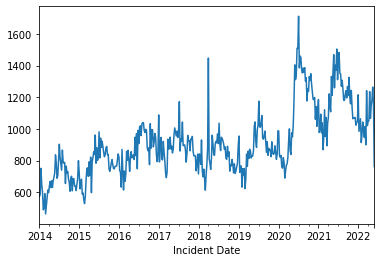

In [21]:
resampled_df.groupby('Incident Date')[Y_COL].sum().plot()

In [22]:
joined_df.iloc[joined_df['Total'].idxmax()]

Incident ID                     577157
Incident Date      2016-06-12 00:00:00
State                          Florida
City Or County                 Orlando
Address           1912 S Orange Avenue
Killed                              50
Injured                             53
Total                              103
Name: 342270, dtype: object

In [23]:
resampled_df

,Incident Date,Killed,Injured,Total
52,2014-01-05,188,385,573
53,2014-01-12,201,386,587
54,2014-01-19,264,487,751
55,2014-01-26,261,387,648
56,2014-02-02,245,357,602
...,...,...,...,...
486,2022-05-01,403,742,1145
487,2022-05-08,423,759,1182
488,2022-05-15,372,892,1264
489,2022-05-22,404,755,1159


In [24]:
# Constants
# =============================================================================
#%%
df = resampled_df.copy()

df.rename(columns={Y_COL: 'y', DATE_COL: 'ds'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df = df[['ds', 'y']]
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=PERIODS_TO_FORECAST)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
plot_plotly(m, forecast)

22:07:17 - cmdstanpy - INFO - Chain [1] start processing
22:07:17 - cmdstanpy - INFO - Chain [1] done processing
